In [60]:
set.seed(123)

In [61]:
install.packages("caret")
library(caret)
install.packages("tidyverse")
library(tidyverse)
install.packages("corrplot")
library(corrplot)


Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//Rtmph3MRmL/downloaded_packages

Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//Rtmph3MRmL/downloaded_packages

Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//Rtmph3MRmL/downloaded_packages


In [62]:
train <- read.csv("Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv")
label <- read.csv("Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv")
test <- read.csv("Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv")
trainMerged <- inner_join(train, label, by='building_id')




In [14]:
data<-trainMerged[sample(nrow(trainMerged),50000),]

In [63]:
dim(train)
dim(label)
dim(test)
dim(trainMerged)

[1] 260601     39

[1] 260601      2

[1] 86868    39

[1] 260601     40

In [64]:
character_variables_bool<-sapply(trainMerged[1,],class)=="character"
character_variables_bool

building_id                         geo_level_1_id 
                                 FALSE                                  FALSE 
                        geo_level_2_id                         geo_level_3_id 
                                 FALSE                                  FALSE 
                   count_floors_pre_eq                                    age 
                                 FALSE                                  FALSE 
                       area_percentage                      height_percentage 
                                 FALSE                                  FALSE 
                land_surface_condition                        foundation_type 
                                  TRUE                                   TRUE 
                             roof_type                      ground_floor_type 
                                  TRUE                                   TRUE 
                      other_floor_type                               position 
                                  TRUE                                   TRUE 
                    plan_configuration           has_superstructure_adobe_mud 
                                  TRUE                                  FALSE 
   has_superstructure_mud_mortar_stone          has_superstructure_stone_flag 
                                 FALSE                                  FALSE 
has_superstructure_cement_mortar_stone    has_superstructure_mud_mortar_brick 
                                 FALSE                                  FALSE 
has_superstructure_cement_mortar_brick              has_superstructure_timber 
                                 FALSE                                  FALSE 
             has_superstructure_bamboo   has_superstructure_rc_non_engineered 
                                 FALSE                                  FALSE 
      has_superstructure_rc_engineered               has_superstructure_other 
                                 FALSE                                  FALSE 
                legal_ownership_status                         count_families 
                                  TRUE                                  FALSE 
                     has_secondary_use          has_secondary_use_agriculture 
                                 FALSE                                  FALSE 
               has_secondary_use_hotel               has_secondary_use_rental 
                                 FALSE                                  FALSE 
         has_secondary_use_institution               has_secondary_use_school 
                                 FALSE                                  FALSE 
            has_secondary_use_industry          has_secondary_use_health_post 
                                 FALSE                                  FALSE 
          has_secondary_use_gov_office           has_secondary_use_use_police 
                                 FALSE                                  FALSE 
               has_secondary_use_other                           damage_grade 
                                 FALSE                                  FALSE

In [65]:
character_variables <- which(sapply(trainMerged[1,],class)=="character")
character_variables

land_surface_condition        foundation_type              roof_type 
                     9                     10                     11 
     ground_floor_type       other_floor_type               position 
                    12                     13                     14 
    plan_configuration legal_ownership_status 
                    15                     27

In [66]:
data_preprocessed<-trainMerged[,-character_variables]
dim(data_preprocessed)


[1] 260601     32

In [67]:
cols_to_transform <- c("land_surface_condition", "foundation_type", "roof_type",
                       "ground_floor_type", "other_floor_type", "position", 
                       "plan_configuration", "legal_ownership_status")

one_hot_trans <- dummyVars(formula = ~ ., data = trainMerged[, cols_to_transform])

data_one_hot <- data.frame(predict(one_hot_trans, newdata = trainMerged))

In [68]:
trainCleaned <- cbind(data_preprocessed, data_one_hot)


In [69]:
trainCleaned <- trainCleaned %>% relocate(damage_grade, .after = legal_ownership_statusw)
trainCleaned <- select(trainCleaned, -c(building_id))
head(trainCleaned)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configurationn,plan_configurationo,plan_configurationq,plan_configurations,plan_configurationu,legal_ownership_statusa,legal_ownership_statusr,legal_ownership_statusv,legal_ownership_statusw,damage_grade
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,1,0,3
2,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,1,0,2
3,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,1,0,3
4,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,1,0,2
5,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,1,0,3
6,8,558,6089,2,10,9,5,0,1,0,...,0,0,0,0,0,0,0,1,0,2


In [71]:
numeric_data = c()
for (i in 1:ncol(trainCleaned)-1) {
    if (class(trainCleaned[, i]) != "character") {
        numeric_data <- append(numeric_data, i)
    }
}
cormat <- abs(cor(trainCleaned[, numeric_data]))
cormat

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configurationm,plan_configurationn,plan_configurationo,plan_configurationq,plan_configurations,plan_configurationu,legal_ownership_statusa,legal_ownership_statusr,legal_ownership_statusv,legal_ownership_statusw
geo_level_1_id,1.0000000000,0.0614048534,0.0027184451,0.089363579,0.003907635,0.0711581503,0.063474054,0.018245465,0.152037764,0.0076772072,...,0.0040479654,8.222888e-04,0.0081792905,0.0093826688,0.0085588975,0.0330521678,0.1003929898,0.0078735782,0.0820548764,0.0046460055
geo_level_2_id,0.0614048534,1.0000000000,0.0009210931,0.047729694,0.012593841,0.0494432851,0.035516389,0.015832855,0.076491325,0.0087428232,...,0.0079705908,4.151702e-04,0.0057857317,0.0043257875,0.0059284248,0.0255317097,0.0258932511,0.0270114837,0.0231892461,0.0135791615
geo_level_3_id,0.0027184451,0.0009210931,1.0000000000,0.021646316,0.006384587,0.0056426426,0.024506767,0.015732164,0.026294351,0.0195789298,...,0.0050897941,3.123084e-03,0.0028035078,0.0018949999,0.0033985366,0.0032398945,0.0341990799,0.0013094153,0.0185331138,0.0130999509
count_floors_pre_eq,0.0893635793,0.0477296944,0.0216463160,1.000000000,0.086668031,0.1010711767,0.772734385,0.174851702,0.027115976,0.0410575457,...,0.0158911829,2.651229e-03,0.0011476617,0.0331697188,0.0033141212,0.0048632406,0.0968661322,0.0082357340,0.0732731967,0.0070463940
age,0.0039076350,0.0125938406,0.0063845871,0.086668031,1.000000000,0.0043225113,0.061073549,0.068032466,0.001321263,0.0091287713,...,0.0106774299,1.461564e-03,0.0009169155,0.0016763126,0.0010114978,0.0036296854,0.0239280619,0.0010548545,0.0166966229,0.0036422654
area_percentage,0.0711581503,0.0494432851,0.0056426426,0.101071177,0.004322511,1.0000000000,0.196645285,0.026286747,0.225540553,0.0004726122,...,0.0229627322,3.568111e-03,0.0356325668,0.0166477585,0.0191642308,0.0961701006,0.0282488709,0.0153428904,0.0292612123,0.0031133554
height_percentage,0.0634740542,0.0355163893,0.0245067672,0.772734385,0.061073549,0.1966452848,1.000000000,0.149725170,0.106572989,0.0202600396,...,0.0144572940,2.732364e-03,0.0066370928,0.0164955225,0.0001258120,0.0061965183,0.0788515447,0.0086931388,0.0630496531,0.0008372311
has_superstructure_adobe_mud,0.0182454652,0.0158328554,0.0157321636,0.174851702,0.068032466,0.0262867471,0.149725170,1.000000000,0.306861168,0.0069617504,...,0.0050023100,1.530135e-03,0.0027853664,0.0173120256,0.0053125257,0.0190196841,0.0301759065,0.0251080746,0.0046808661,0.0331649780
has_superstructure_mud_mortar_stone,0.1520377636,0.0764913251,0.0262943509,0.027115976,0.001321263,0.2255405528,0.106572989,0.306861168,1.000000000,0.0340455999,...,0.0135974488,3.467759e-05,0.0208515104,0.0509111924,0.0174759834,0.0985564267,0.1387459777,0.0478715860,0.1266407426,0.0037261188
has_superstructure_stone_flag,0.0076772072,0.0087428232,0.0195789298,0.041057546,0.009128771,0.0004726122,0.020260040,0.006961750,0.034045600,1.0000000000,...,0.0006674208,5.316792e-04,0.0055826154,0.0117625293,0.0035426230,0.0095558954,0.0083835268,0.0049394746,0.0055453273,0.0052446171


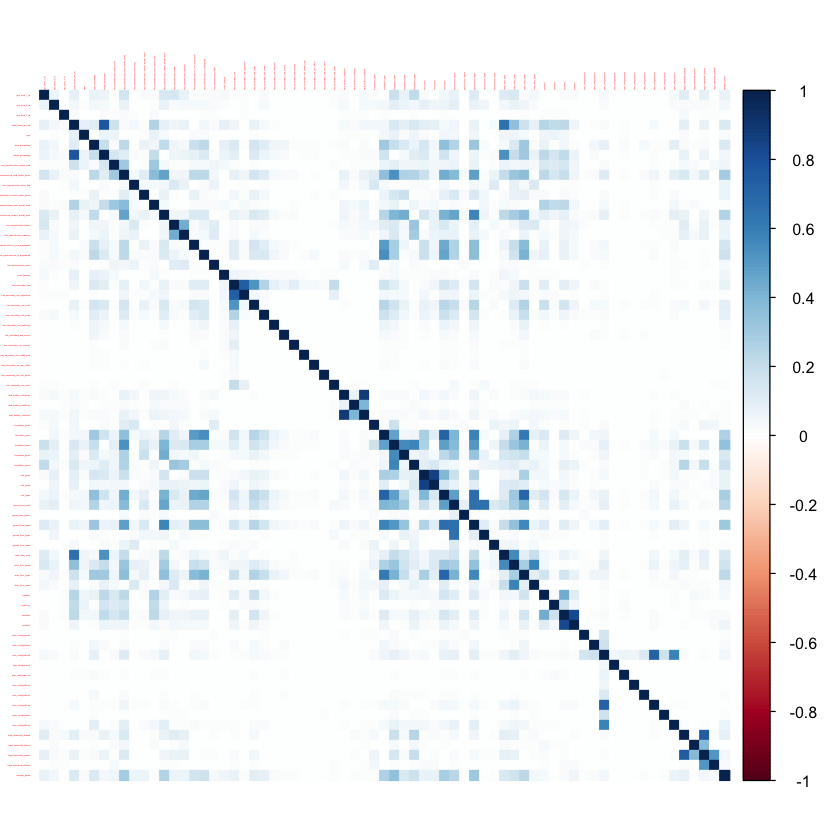

In [72]:
cormat <- abs(cor(trainCleaned))
corrplot(cormat, tl.cex = 0.1, method = "color")


In [73]:
to_delete_DG = c()
for (i in 1:(nrow(cormat))) {
    for (j in i:(nrow(cormat))) {
        if (cormat[i,j] > 0.5 &  i!=j) {
            if (abs(cormat[i,68]) < abs(cormat[j,68])) {
                to_delete_DG <- c(to_delete_DG, i)
            } else {
                to_delete_DG <- c(to_delete_DG, j)
            }
        }
    }
}
to_delete_DG <- to_delete_DG[!duplicated(to_delete_DG)]

to_delete_DG


[1]  7  4  9 44 35 21 22 31 49 37 36 40 41 45 48 50 54 62 64 65 67

In [239]:
for (i in 1:(nrow(cormat)-1)) {
    if (cormat[i, 68] < 0.01) {
        to_delete_DG <- c(to_delete_DG, i)
    }
}
to_delete_DG <- to_delete_DG[!duplicated(to_delete_DG)]
to_delete_DG


[1]  8  5 10 45 17 36 22 21 32 38 37 40 42 50 43 46 49 51 55 58 65 66 69  1  3
[26]  4  6  7  9 11 12 13 14 18 19 20 23 24 25 26 27 28 29 30 31 33 34 35 41 44
[51] 47 52 53 54 56 57 59 60 61 62 63 64  2 15 16 48

In [74]:
trainCleanedD <- select(trainCleaned,-c(to_delete_DG))


Input and output varaibles 

In [75]:


X<-trainCleanedD[,setdiff(colnames(trainCleanedD),"damage_grade")]
Y<-trainCleanedD[,"damage_grade"]


N <-nrow(X)
n <-ncol(X)

In [76]:
N
n

[1] 260601

[1] 47

In [77]:
mean(Y)

[1] 2.238272

In [1]:
var(Y)

ERROR: Error in is.data.frame(x): objet 'Y' introuvable


In [88]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]  
    Y_ts<-Y[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]                          
    
    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
     
    for (nb_features in 1:n) {
        # Create a dataset including only the nb_features most correlated variables with the output
        DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],damage_grade=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        # Cross validation error = MSE
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

 [1] "#Features:  1  ; CV error= 0.3501  ; std dev= 0.0019" 
 [2] "#Features:  2  ; CV error= 0.3436  ; std dev= 0.0021" 
 [3] "#Features:  3  ; CV error= 0.338  ; std dev= 0.002"   
 [4] "#Features:  4  ; CV error= 0.3256  ; std dev= 0.002"  
 [5] "#Features:  5  ; CV error= 0.3211  ; std dev= 0.0018" 
 [6] "#Features:  6  ; CV error= 0.32  ; std dev= 0.0018"   
 [7] "#Features:  7  ; CV error= 0.3197  ; std dev= 0.0019" 
 [8] "#Features:  8  ; CV error= 0.3195  ; std dev= 0.0019" 
 [9] "#Features:  9  ; CV error= 0.3192  ; std dev= 0.0018" 
[10] "#Features:  10  ; CV error= 0.3189  ; std dev= 0.0018"
[11] "#Features:  11  ; CV error= 0.3189  ; std dev= 0.0018"
[12] "#Features:  12  ; CV error= 0.3182  ; std dev= 0.0017"
[13] "#Features:  13  ; CV error= 0.3168  ; std dev= 0.0017"
[14] "#Features:  14  ; CV error= 0.3167  ; std dev= 0.0017"
[15] "#Features:  15  ; CV error= 0.3165  ; std dev= 0.0018"
[16] "#Features:  16  ; CV error= 0.3159  ; std dev= 0.0018"
[17] "#Features:  17  ; 

In [89]:
NuF1 <- correlation_ranking_idx
NaF1 <- colnames(X)[correlation_ranking_idx]
NuF1
NaF1

[1] 10 31 14 29 13 34  5 18 30 17  1 11  7 12  8 16  6 40  2 35 15 47  4 19 37
[26] 39 38 32 33 25 27 26 28  9 44 21 45 20 23 22  3 42 36 46 43 24 41

[1] "has_superstructure_cement_mortar_brick"
 [2] "ground_floor_typef"                    
 [3] "has_superstructure_rc_engineered"      
 [4] "foundation_typew"                      
 [5] "has_superstructure_rc_non_engineered"  
 [6] "other_floor_typej"                     
 [7] "area_percentage"                       
 [8] "has_secondary_use_rental"              
 [9] "roof_typen"                            
[10] "has_secondary_use"                     
[11] "geo_level_1_id"                        
[12] "has_superstructure_timber"             
[13] "has_superstructure_stone_flag"         
[14] "has_superstructure_bamboo"             
[15] "has_superstructure_cement_mortar_stone"
[16] "count_families"                        
[17] "has_superstructure_adobe_mud"          
[18] "plan_configurationd"                   
[19] "geo_level_2_id"                        
[20] "positionj"                             
[21] "has_superstructure_other"              
[22] "legal_ownership_statusw"               
[23] "age"                                   
[24] "has_secondary_use_institution"         
[25] "positions"                             
[26] "plan_configurationc"                   
[27] "plan_configurationa"                   
[28] "ground_floor_typem"                    
[29] "ground_floor_typez"                    
[30] "has_secondary_use_other"               
[31] "land_surface_conditiont"               
[32] "land_surface_conditiono"               
[33] "foundation_typeh"                      
[34] "has_superstructure_mud_mortar_brick"   
[35] "plan_configurationo"                   
[36] "has_secondary_use_industry"            
[37] "plan_configurations"                   
[38] "has_secondary_use_school"              
[39] "has_secondary_use_gov_office"          
[40] "has_secondary_use_health_post"         
[41] "geo_level_3_id"                        
[42] "plan_configurationm"                   
[43] "positiono"                             
[44] "legal_ownership_statusr"               
[45] "plan_configurationn"                   
[46] "has_secondary_use_use_police"          
[47] "plan_configurationf"

In [90]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)

CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]  
    Y_ts<-Y[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]                          
    
    # Computing the correlation between input variables and output variable on the training set
    correlation<-abs(cor(X_tr,Y_tr))
    
    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the correlation with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            # Compute the correlation between the selected variables and the candidates on the training set
            cor_selected_candidates<-cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])
            # Compute the mean correlation for each candidate variable, across the selected variables
            redundancy_score<-apply(cor_selected_candidates,2,mean)
        }
        
        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-correlation[candidates]-redundancy_score
        
        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],damage_grade=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

 [1] "#Features:  1  ; CV error= 0.3501  ; std dev= 0.0019" 
 [2] "#Features:  2  ; CV error= 0.3436  ; std dev= 0.0021" 
 [3] "#Features:  3  ; CV error= 0.338  ; std dev= 0.002"   
 [4] "#Features:  4  ; CV error= 0.3336  ; std dev= 0.0019" 
 [5] "#Features:  5  ; CV error= 0.3211  ; std dev= 0.0018" 
 [6] "#Features:  6  ; CV error= 0.3207  ; std dev= 0.0017" 
 [7] "#Features:  7  ; CV error= 0.3205  ; std dev= 0.0018" 
 [8] "#Features:  8  ; CV error= 0.3194  ; std dev= 0.0019" 
 [9] "#Features:  9  ; CV error= 0.3183  ; std dev= 0.0019" 
[10] "#Features:  10  ; CV error= 0.3183  ; std dev= 0.0019"
[11] "#Features:  11  ; CV error= 0.3181  ; std dev= 0.0019"
[12] "#Features:  12  ; CV error= 0.3179  ; std dev= 0.0018"
[13] "#Features:  13  ; CV error= 0.3172  ; std dev= 0.0019"
[14] "#Features:  14  ; CV error= 0.3171  ; std dev= 0.0018"
[15] "#Features:  15  ; CV error= 0.3165  ; std dev= 0.0021"
[16] "#Features:  16  ; CV error= 0.3159  ; std dev= 0.0018"
[17] "#Features:  17  ; 

In [91]:
NuF2 <- selected
NaF2 <- colnames(X)[selected]
NuF2
NaF2

[1] 10 31 14 13 29 30  5 34  7 40  6 18 16  2 11 17  8 37  1 35  4 47 12 39 38
[26] 19 27 26 32 15 44 45 33 25  3 42 22 21 23 20 43 28  9 24 41 46 36

[1] "has_superstructure_cement_mortar_brick"
 [2] "ground_floor_typef"                    
 [3] "has_superstructure_rc_engineered"      
 [4] "has_superstructure_rc_non_engineered"  
 [5] "foundation_typew"                      
 [6] "roof_typen"                            
 [7] "area_percentage"                       
 [8] "other_floor_typej"                     
 [9] "has_superstructure_stone_flag"         
[10] "plan_configurationd"                   
[11] "has_superstructure_adobe_mud"          
[12] "has_secondary_use_rental"              
[13] "count_families"                        
[14] "geo_level_2_id"                        
[15] "has_superstructure_timber"             
[16] "has_secondary_use"                     
[17] "has_superstructure_cement_mortar_stone"
[18] "positions"                             
[19] "geo_level_1_id"                        
[20] "positionj"                             
[21] "age"                                   
[22] "legal_ownership_statusw"               
[23] "has_superstructure_bamboo"             
[24] "plan_configurationc"                   
[25] "plan_configurationa"                   
[26] "has_secondary_use_institution"         
[27] "land_surface_conditiont"               
[28] "land_surface_conditiono"               
[29] "ground_floor_typem"                    
[30] "has_superstructure_other"              
[31] "plan_configurationo"                   
[32] "plan_configurations"                   
[33] "ground_floor_typez"                    
[34] "has_secondary_use_other"               
[35] "geo_level_3_id"                        
[36] "plan_configurationm"                   
[37] "has_secondary_use_health_post"         
[38] "has_secondary_use_industry"            
[39] "has_secondary_use_gov_office"          
[40] "has_secondary_use_school"              
[41] "plan_configurationn"                   
[42] "foundation_typeh"                      
[43] "has_superstructure_mud_mortar_brick"   
[44] "has_secondary_use_use_police"          
[45] "plan_configurationf"                   
[46] "legal_ownership_statusr"               
[47] "positiono"

In [92]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

# Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X,retx=T)$x)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_pca[idx_ts,]  
    Y_ts<-Y[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-Y[idx_tr]         
     
    for (nb_components in 1:n) {
        # Create a dataset including only the first nb_components principal components
        DS<-cbind(X_tr[,1:nb_components,drop=F],damage_grade=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model predict
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        
        CV_err[nb_components,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


 [1] "#Features:  1  ; CV error= 0.3743  ; std dev= 0.0018" 
 [2] "#Features:  2  ; CV error= 0.3736  ; std dev= 0.0018" 
 [3] "#Features:  3  ; CV error= 0.3733  ; std dev= 0.0018" 
 [4] "#Features:  4  ; CV error= 0.3713  ; std dev= 0.0019" 
 [5] "#Features:  5  ; CV error= 0.3662  ; std dev= 0.0022" 
 [6] "#Features:  6  ; CV error= 0.3621  ; std dev= 0.0023" 
 [7] "#Features:  7  ; CV error= 0.3547  ; std dev= 0.0024" 
 [8] "#Features:  8  ; CV error= 0.3519  ; std dev= 0.0027" 
 [9] "#Features:  9  ; CV error= 0.3439  ; std dev= 0.0024" 
[10] "#Features:  10  ; CV error= 0.3358  ; std dev= 0.0024"
[11] "#Features:  11  ; CV error= 0.3354  ; std dev= 0.0025"
[12] "#Features:  12  ; CV error= 0.3349  ; std dev= 0.0024"
[13] "#Features:  13  ; CV error= 0.3347  ; std dev= 0.0024"
[14] "#Features:  14  ; CV error= 0.3347  ; std dev= 0.0024"
[15] "#Features:  15  ; CV error= 0.333  ; std dev= 0.0024" 
[16] "#Features:  16  ; CV error= 0.331  ; std dev= 0.0022" 
[17] "#Features:  17  ; 

In [84]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10

size_CV <-floor(N/CV_folds)

selected<-NULL

# Perform up to n (number of variables) round of selection
for (round in 1:n) { 
    candidates<-setdiff(1:n,selected)
    
    CV_err<-matrix(0,nrow=length(candidates),ncol=CV_folds)
    
    # For each round, test all the candidate variables
    for (j in 1:length(candidates)) {
        features_to_include<-c(selected,candidates[j])
        
        # For each variable, perform cross-validation to determine the CV-error
        for (i in 1:CV_folds) {
            
            idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
            X_ts<-X[idx_ts,features_to_include,drop=F]  
            Y_ts<-Y[idx_ts]  
     
            idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
            X_tr<-X[idx_tr,features_to_include,drop=F]
            Y_tr<-Y[idx_tr]         
            
            # Create a dataset including only the first nb_components principal components
            DS<-cbind(X_tr,damage_grade=Y_tr)
        
            # Model fit (using lm function)
            model<- lm(damage_grade~.,DS)
        
            # Model predict
            Y_hat_ts<- predict(model,X_ts)
     
            # Cross validation error = MSE
            CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
        }
        
    }
    
    # Compute the mean and sd of cross-validation error across all the candidates
    # In CV_err matrix, every row represents a candidate, and every element represents the results of the i^th CV fold.
    CV_err_mean<-apply(CV_err,1,mean)
    CV_err_sd<-apply(CV_err,1,sd)
    
    # Select the candiate that minimizes the cross-validation error
    selected_current<-which.min(CV_err_mean)              
    selected<-c(selected,candidates[selected_current])
    
    print(paste("Round ",round," ; Selected feature: ",candidates[selected_current]," ; CV error=",round(CV_err_mean[selected_current],digits=4), " ; std dev=",round(CV_err_sd[selected_current],digits=4)))

}
              

In [ ]:
colnames(X)[selected]

In [99]:
NaF2 <- 33
selected_features <- ranking[1:NaF2] 

New_Train <- trainCleanedD[, selected_features, drop = FALSE]

# Ajoutez la variable cible si nécessaire
New_Train <- cbind(New_Train, damage_grade = Y)


In [100]:
New_Train

,has_superstructure_cement_mortar_brick,ground_floor_typef,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,foundation_typew,roof_typen,area_percentage,other_floor_typej,has_superstructure_stone_flag,plan_configurationd,...,plan_configurationa,has_secondary_use_institution,land_surface_conditiont,land_surface_conditiono,ground_floor_typem,has_superstructure_other,plan_configurationo,plan_configurations,ground_floor_typez,damage_grade
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,...,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,0,1,0,0,0,1,6,0,0,1,...,0,0,1,0,0,0,0,0,0,3
2,0,0,0,0,0,1,8,0,0,1,...,0,0,0,1,0,0,0,0,0,2
3,0,1,0,0,0,1,5,0,0,1,...,0,0,1,0,0,0,0,0,0,3
4,0,1,0,0,0,1,6,0,0,1,...,0,0,1,0,0,0,0,0,0,2
5,0,1,0,0,0,1,8,0,0,1,...,0,0,1,0,0,0,0,0,0,3
6,0,1,0,0,0,1,9,0,0,1,...,0,0,1,0,0,0,0,0,0,2
7,0,0,0,0,0,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,3
8,1,0,0,0,1,0,8,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,0,1,0,0,0,0,8,0,0,1,...,0,0,1,0,0,0,0,0,0,2


In [102]:
X<-New_Train[,setdiff(colnames(New_Train),"damage_grade")]
Y<-New_Train[,"damage_grade"]


N <-nrow(X)
n <-ncol(X)

In [101]:
library(rpart) 

In [109]:
DS<-cbind(X,damage_grade=Y)

model<- rpart(damage_grade~.,DS) ### Fill with you code here
        
Y_hat<- predict(model,X)
        
empirical_error<-mean((Y_hat-Y)^2) 

print(paste("Empirical error=",round(empirical_error,digits=4)))

[1] "Empirical error= 0.2713"


In [110]:
library(rpart.plot) 

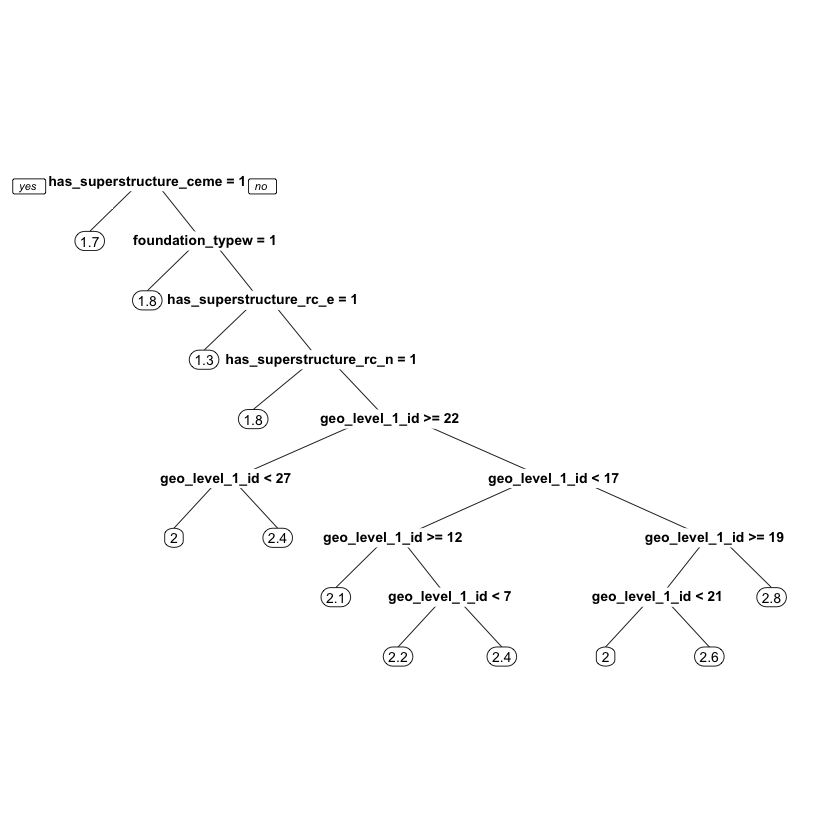

In [111]:
prp(model)

In [112]:
CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X[idx_ts,]  
     Y_ts<-Y[idx_ts]  
     
     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X[idx_tr,]
     Y_tr<-Y[idx_tr]                          
     
     DS<-cbind(X_tr,damage_grade=Y_tr)
    
     # Model fit (using rpart function)
     model<- rpart(damage_grade~.,DS)
     
     # Model prediction 
     Y_hat_ts<- predict(model,X_ts)
     
     # Cross validation error = Mean Squared Error
     CV_err[i]<-mean((Y_hat_ts-Y_ts)^2)
}
    

print(paste("CV error=",round(mean(CV_err),digits=4), " ; std dev=",round(sd(CV_err),digits=4)))

CV_err_rpart_single_model <- CV_err

[1] "CV error= 0.2713  ; std dev= 0.0019"


In [113]:
library(e1071)

CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X[idx_ts,]  
     Y_ts<-Y[idx_ts]  
     
     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X[idx_tr,]
     Y_tr<-Y[idx_tr]                          
     
     DS<-cbind(X_tr,damage_grade=Y_tr)
    
     # Model fit (using lm function)
     model<- svm(damage_grade~.,DS)
     
     # Model prediction 
     Y_hat_ts<- predict(model,X_ts)
     
     # Cross validation error = Mean Squared Error
     CV_err[i]<-mean((Y_hat_ts-Y_ts)^2)
}
    

print(paste("CV error=",round(mean(CV_err),digits=4), " ; std dev=",round(sd(CV_err),digits=4)))

CV_err_svm_single_model <- CV_err

In [2]:
install.packages("MLmetrics")


Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//RtmpxGLoGs/downloaded_packages


In [3]:
library(MLmetrics)


Attachement du package : 'MLmetrics'


L'objet suivant est masqu'e depuis 'package:base':

    Recall


